# WEEK 8 GROUP ACTIVITY

1. Carry out descriptive analytics on the dataset.
2. Check whether female and male students scored the same marks.
3. Whether test preparation helps the students?

In [1]:
#importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing data set in to python envirinment 
data= pd.read_csv('Week_8_Q&A_dataset - Sheet1.csv')

In [3]:
#first five rows of dataset
data.head()

,Gender,Test preparation,Total Marks
0,male,none,14
1,female,none,28
2,female,none,18
3,female,none,48
4,female,none,21


In [4]:
#Last five rows of dataset
data.tail()

,Gender,Test preparation,Total Marks
23,female,none,27
24,female,none,27
25,female,none,38
26,female,completed,50
27,female,completed,43


In [5]:
#shape of the dataset
data.shape

(28, 3)

In [6]:
#columns present in the dataset
data.columns

Index(['Gender', 'Test preparation', 'Total Marks'], dtype='object')

In [7]:
#A concise summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Gender            28 non-null     object
 1   Test preparation  28 non-null     object
 2   Total Marks       28 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 800.0+ bytes


In [8]:
# Checking null values
data.isna().sum()

Gender              0
Test preparation    0
Total Marks         0
dtype: int64

## 1.Carry out descriptive analytics on the dataset. 

In [9]:
# Getting descriptive statistics summary
data.describe()

,Total Marks
count,28.000000
mean,32.321429
std,12.454520
min,12.000000
25%,22.500000
50%,33.000000
75%,43.250000
max,50.000000


<AxesSubplot:title={'center':'Frequency Distribution of Gender'}>

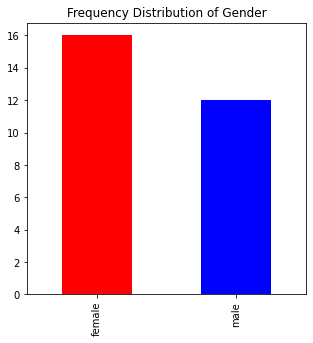

In [10]:
data['Gender'].value_counts().plot.bar(title='Frequency Distribution of Gender',color=['red','blue'],figsize=(5,5))

<AxesSubplot:title={'center':'Frequency Distribution of Test Preparation Course'}>

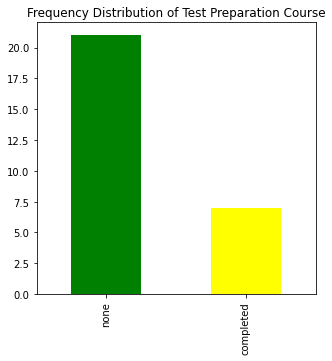

In [11]:
data['Test preparation'].value_counts().plot.bar(title='Frequency Distribution of Test Preparation Course',color=['green','yellow'],figsize=(5,5)) 

In [12]:
data.groupby('Test preparation').mean()

,Total Marks
Test preparation,
completed,44.571429
none,28.238095


In [13]:
data['Gender'].value_counts()

female    16
male      12
Name: Gender, dtype: int64

Data insight: 
* Total 28 students present in the dataset.
* From the frequency distribution graph based on gender females are more as compared to males.
* From the  Frequency Distribution graph based on Test Preparation Course, most students did't complete their course.
* Maximum score is 50 and minimum score is 12.

## 2.Check whether female and male students scored the same marks 
 

In [23]:
grouped=data.groupby('Gender')
male=grouped.get_group('male')
male

,Gender,Test preparation,Total Marks
0,male,none,14
6,male,none,30
8,male,none,18
9,male,none,24
10,male,completed,44
11,male,none,23
12,male,completed,43
13,male,none,28
18,male,none,47
19,male,none,36


In [24]:
female=grouped.get_group('female')
female

,Gender,Test preparation,Total Marks
1,female,none,28
2,female,none,18
3,female,none,48
4,female,none,21
5,female,completed,40
7,female,none,12
14,female,none,41
15,female,none,13
16,female,completed,48
17,female,none,45


Test for hypothesis Whether test preparation helps the students
 * Null hypothesis H0- female and male students scored the same marks 
 * Alternative hypothesis H1- female and male students scored the different marks 

In [22]:
from scipy import stats
ttest,pval=stats.ttest_ind(female,male,axis=0)
print("p-value",pval)
if pval<0.05:
    print("reject null hypothesis ,i.e. Mean score of females<= Mean score of male students")
else:
    print("accept null hypothesis, ,i.e. Mean score of females> Mean score of male students")

p-value 0.4937822317960763
accept null hypothesis, ,i.e. Mean score of females> Mean score of male students


## 3. Whether test preparation helps the students? 

In [25]:
data['Test preparation'].value_counts()

none         21
completed     7
Name: Test preparation, dtype: int64

In [26]:
data.groupby('Test preparation').mean()

,Total Marks
Test preparation,
completed,44.571429
none,28.238095


In [34]:
grouped=data.groupby('Test preparation')
c_ompleted=grouped.get_group('completed')
c_ompleted

,Gender,Test preparation,Total Marks
5,female,completed,40
10,male,completed,44
12,male,completed,43
16,female,completed,48
21,male,completed,44
26,female,completed,50
27,female,completed,43


In [35]:
grouped=data.groupby('Test preparation')
n_one=grouped.get_group('none')
n_one

,Gender,Test preparation,Total Marks
0,male,none,14
1,female,none,28
2,female,none,18
3,female,none,48
4,female,none,21
6,male,none,30
7,female,none,12
8,male,none,18
9,male,none,24
11,male,none,23


Test for hypothesis Whether test preparation helps the students
* Null hypothesis H0-Test preparation not helps the students for achieving more marks.
* Alternative hypothesis H1-Test preparation  helps the students for achieving more marks

In [48]:
from scipy import stats
ttest,pval=stats.ttest_ind(c_ompleted['Total Marks'],n_one['Total Marks'],alternative='greater')
print("p-value",pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")


p-value 0.0006335646228660053
reject null hypothesis


* Test preparation helps the students for achieving more marks.